In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [67]:
df = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/World%20Happiness/happiness_score_dataset.csv')

In [3]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4]:
df.shape

(158, 12)

In [5]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [6]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [9]:
df.nunique()

Country                          158
Region                            10
Happiness Rank                   157
Happiness Score                  157
Standard Error                   153
Economy (GDP per Capita)         158
Family                           158
Health (Life Expectancy)         157
Freedom                          158
Trust (Government Corruption)    157
Generosity                       158
Dystopia Residual                158
dtype: int64

In [68]:
df = df.rename(columns={'Economy (GDP per Capita)':'Economy'})
df = df.rename(columns={'Health (Life Expectancy)':'Health'})
df = df.rename(columns={'Trust (Government Corruption)':'Trust'})
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [26]:
df['Region'].value_counts()

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64

In [27]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


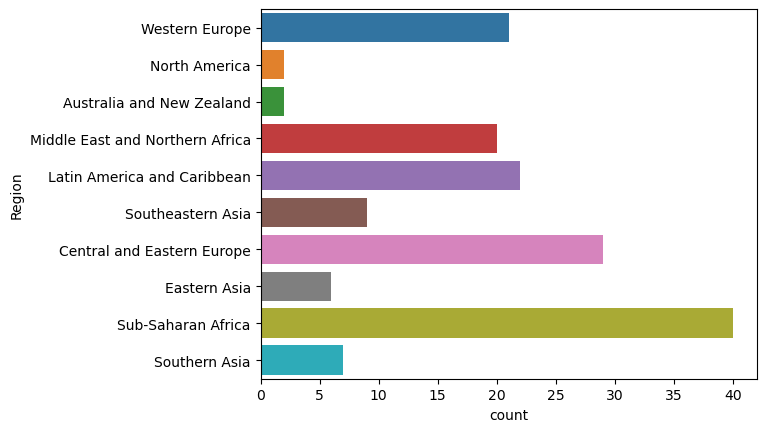

In [28]:
sns.countplot(y='Region', data=df)
plt.show()

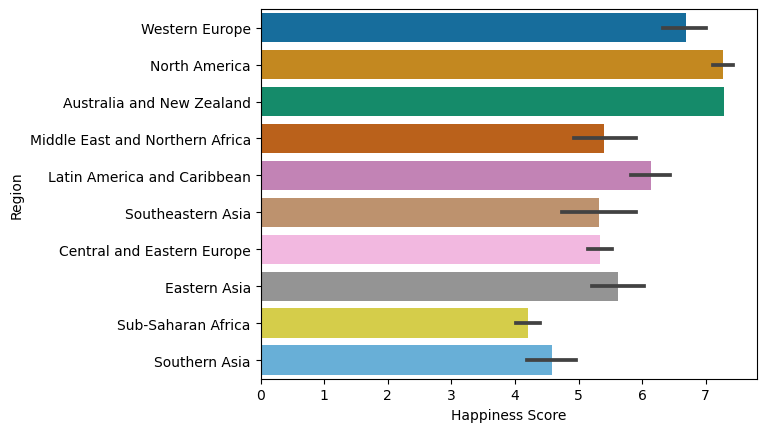

In [29]:
sns.barplot(x='Happiness Score', y='Region', data=df, palette='colorblind')
plt.show()

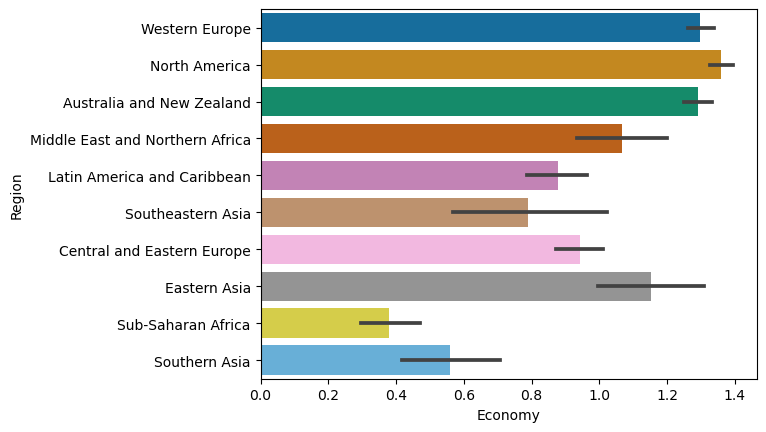

In [30]:
sns.barplot(x='Economy', y='Region', data=df, palette='colorblind')
plt.show()

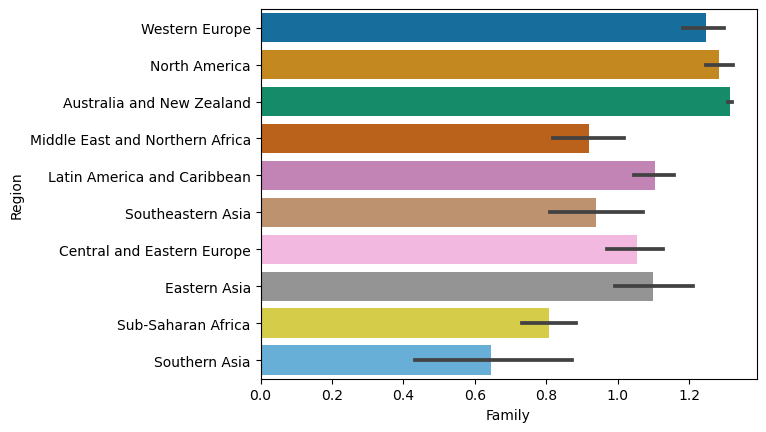

In [32]:
sns.barplot(x='Family', y='Region', data=df, palette='colorblind')
plt.show()

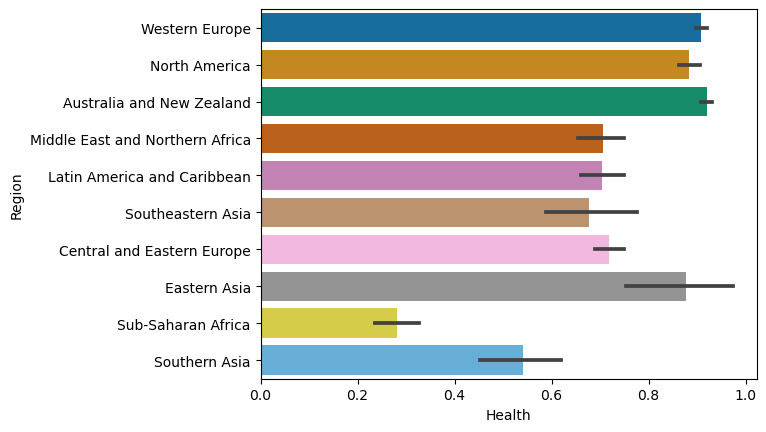

In [33]:
sns.barplot(x='Health', y='Region', data=df, palette='colorblind')
plt.show()

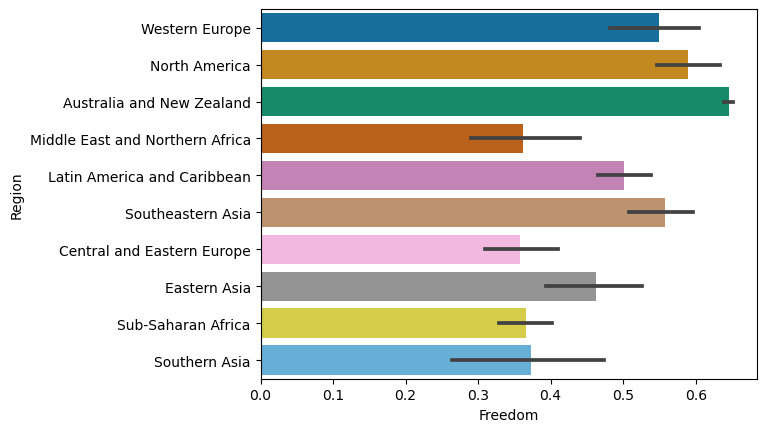

In [34]:
sns.barplot(x='Freedom', y='Region', data=df, palette='colorblind')
plt.show()

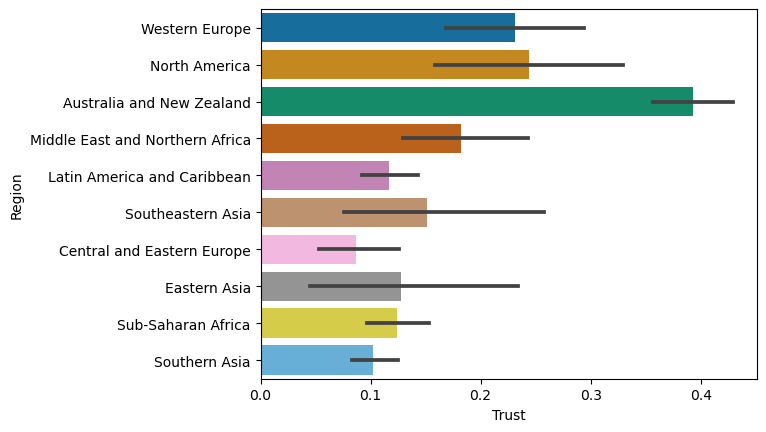

In [35]:
sns.barplot(x='Trust', y='Region', data=df, palette='colorblind')
plt.show()

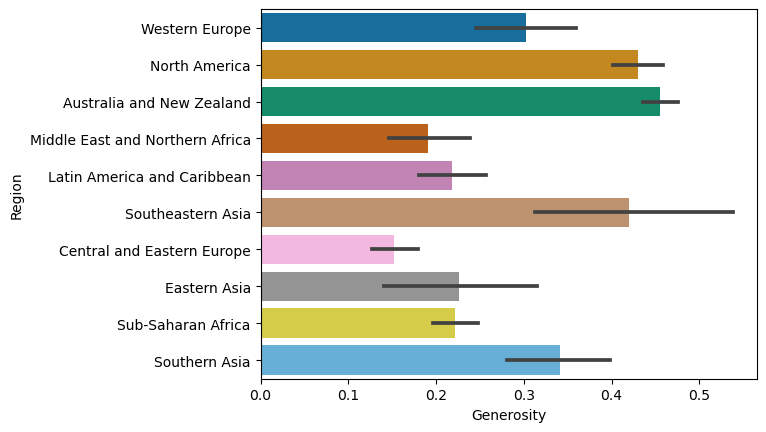

In [36]:
sns.barplot(x='Generosity', y='Region', data=df, palette='colorblind')
plt.show()

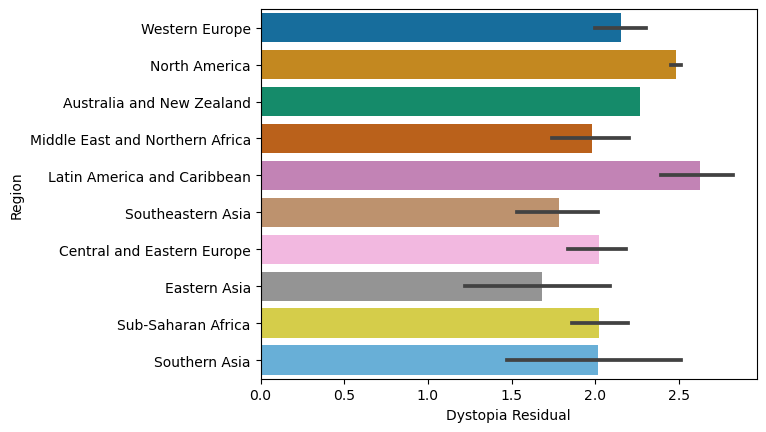

In [37]:
sns.barplot(x='Dystopia Residual', y='Region', data=df, palette='colorblind')
plt.show()

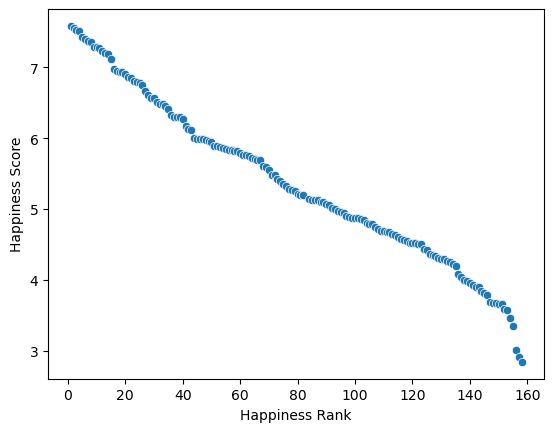

In [44]:
sns.scatterplot(x='Happiness Rank', y='Happiness Score', data=df)
plt.show()

In [51]:
num_df = df.drop('Country', axis=1)
num_df = num_df.drop('Region', axis=1)
num_df.head()

,Happiness Rank,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual
0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


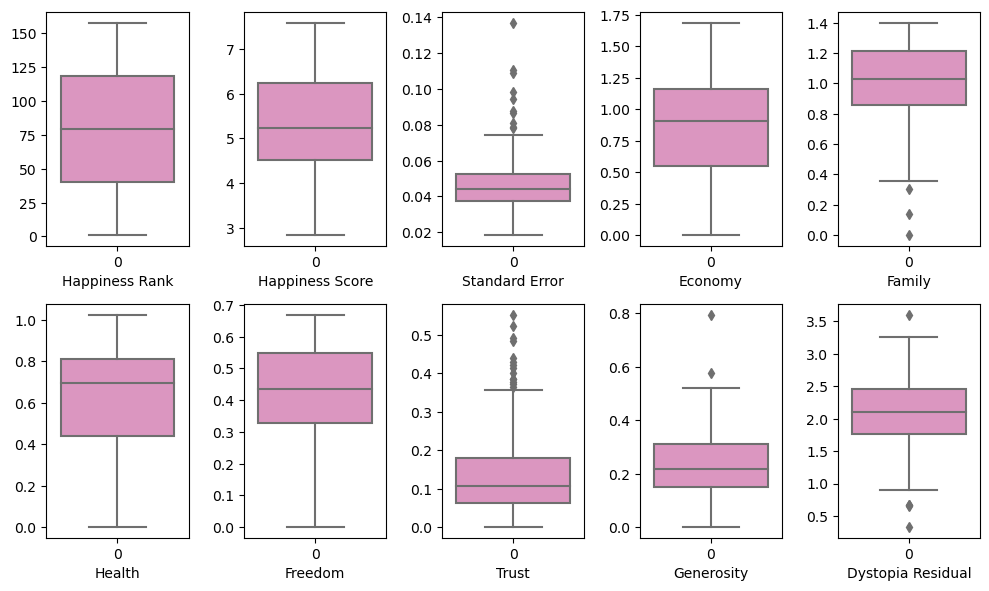

In [62]:
plt.figure(figsize = (10, 6), facecolor = "white")
plotnumber = 1
for c in num_df.columns:
    if plotnumber <= 10:
        x=plt.subplot(2,5,plotnumber)
        sns.boxplot(df[c], palette = "Set2_r")
        plt.xlabel(c, fontsize = 10)
        plt.yticks(rotation = 0, fontsize = 10)
    plotnumber+=1
plt.tight_layout()

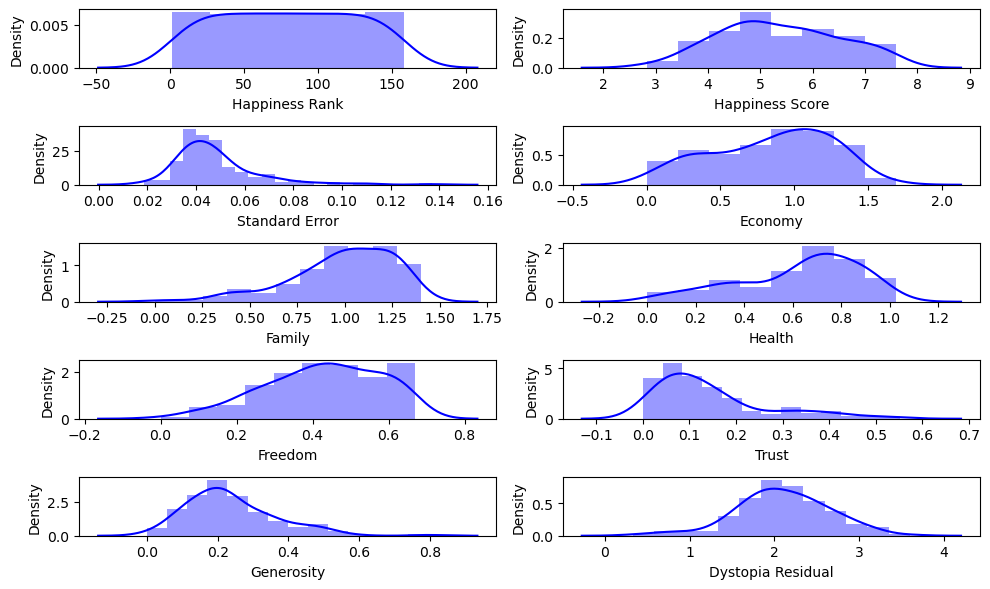

In [61]:
plt.figure(figsize = (10, 6), facecolor = "white")
plotnumber = 1
for c in num_df.columns:
    if plotnumber <= 10:
        x=plt.subplot(5,2,plotnumber)
        sns.distplot(df[c],color = "b")
        plt.xlabel(c, fontsize = 10)
        plt.yticks(rotation = 0, fontsize = 10)
    plotnumber+=1
plt.tight_layout()

In [69]:
df.skew()

Happiness Rank       0.000418
Happiness Score      0.097769
Standard Error       1.983439
Economy             -0.317575
Family              -1.006893
Health              -0.705328
Freedom             -0.413462
Trust                1.385463
Generosity           1.001961
Dystopia Residual   -0.238911
dtype: float64

In [70]:
df['Standard Error']=np.cbrt(df['Standard Error'])
df['Health']=np.cbrt(df['Health'])
df['Trust']=np.cbrt(df['Trust'])
df['Generosity']=np.cbrt(df['Generosity'])

In [71]:
df.skew()

Happiness Rank       0.000418
Happiness Score      0.097769
Standard Error       0.979748
Economy             -0.317575
Family              -1.006893
Health              -1.981292
Freedom             -0.413462
Trust                0.011932
Generosity          -0.961079
Dystopia Residual   -0.238911
dtype: float64

In [72]:
df['Standard Error']=np.cbrt(df['Standard Error'])

In [73]:
df.skew()

Happiness Rank       0.000418
Happiness Score      0.097769
Standard Error       0.650861
Economy             -0.317575
Family              -1.006893
Health              -1.981292
Freedom             -0.413462
Trust                0.011932
Generosity          -0.961079
Dystopia Residual   -0.238911
dtype: float64

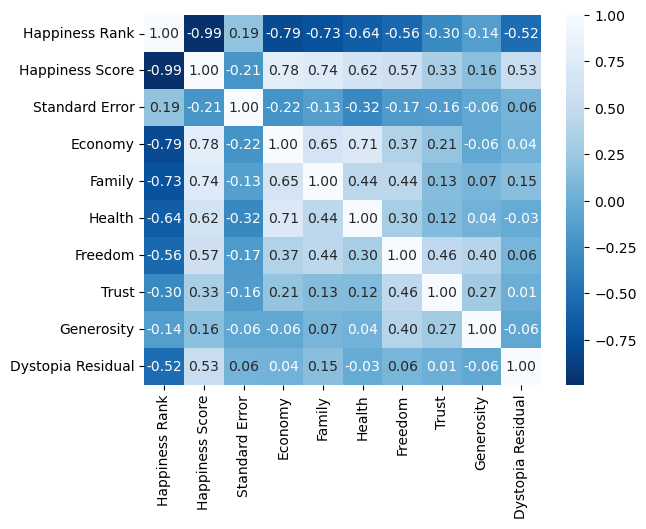

In [76]:
corr = df.corr()
sns.heatmap(corr,annot=True,fmt='0.2f',cmap='Blues_r')
plt.show()

In [78]:
corr['Dystopia Residual'].sort_values(ascending = False)

Dystopia Residual    1.000000
Happiness Score      0.530474
Family               0.148117
Freedom              0.062783
Standard Error       0.056106
Economy              0.040059
Trust                0.010769
Health              -0.026111
Generosity          -0.061511
Happiness Rank      -0.521999
Name: Dystopia Residual, dtype: float64

In [81]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i] = oe.fit_transform(df[i].values.reshape(-1,1))
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual
0,135.0,9.0,1,7.587,0.687048,1.39651,1.34951,0.980083,0.66557,0.748756,0.667029,2.51738
1,58.0,9.0,2,7.561,0.715004,1.30232,1.40223,0.982302,0.62877,0.521036,0.758453,2.70201
2,37.0,9.0,3,7.527,0.685170,1.32548,1.36058,0.956334,0.64938,0.784910,0.698903,2.49204
3,105.0,9.0,4,7.522,0.696953,1.45900,1.33095,0.960171,0.66973,0.714677,0.702704,2.46531
4,24.0,5.0,5,7.427,0.690168,1.32629,1.32261,0.967498,0.63297,0.690742,0.770886,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,118.0,8.0,154,3.465,0.688226,0.22208,0.77370,0.753988,0.59201,0.820269,0.609371,0.67042
154,13.0,8.0,155,3.340,0.692363,0.28665,0.35386,0.683349,0.48450,0.431066,0.567327,1.63328
155,136.0,4.0,156,3.006,0.717110,0.66320,0.47489,0.897081,0.15684,0.573940,0.778484,0.32858
156,21.0,8.0,157,2.905,0.761965,0.01530,0.41587,0.607282,0.11850,0.465116,0.582130,1.83302


In [82]:
x = df.drop('Dystopia Residual', axis =1)
y = df['Dystopia Residual']

In [83]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Trust,Generosity
0,1.238770,1.300256,-1.721000,1.937360,-0.909597,1.369621,1.320281,0.959021,1.577438,1.826993,0.576890
1,-0.449465,1.300256,-1.699075,1.914581,0.210704,1.135226,1.514458,0.973528,1.332456,0.260958,1.325808
2,-0.909893,1.300256,-1.677149,1.884792,-0.984853,1.192861,1.361054,0.803789,1.469659,2.075620,0.837993
3,0.581016,1.300256,-1.655224,1.880411,-0.512654,1.525130,1.251922,0.828870,1.605131,1.592625,0.869128
4,-1.194920,-0.040302,-1.633299,1.797179,-0.784541,1.194876,1.221204,0.876764,1.360416,1.428028,1.427657
...,...,...,...,...,...,...,...,...,...,...,...
153,0.866043,0.965117,1.633576,-1.674055,-0.862389,-1.552987,-0.800520,-0.518863,1.087740,2.318782,0.104570
154,-1.436096,0.965117,1.655501,-1.783571,-0.696582,-1.392303,-2.346860,-0.980600,0.372033,-0.357762,-0.239847
155,1.260695,-0.375441,1.677427,-2.076199,0.295095,-0.455245,-1.901086,0.416476,-1.809238,0.624780,1.489900
156,-1.260695,0.965117,1.699352,-2.164688,2.092613,-2.067566,-2.118467,-1.477816,-2.064472,-0.123602,-0.118581


In [84]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

,VIF values,Features
0,1.074732,Country
1,1.474773,Region
2,76.121246,Happiness Rank
3,77.395867,Happiness Score
4,1.207080,Standard Error
5,3.766300,Economy
6,2.509244,Family
7,2.667197,Health
8,1.945536,Freedom
9,1.431636,Trust


In [85]:
x.drop('Happiness Rank', axis = 1, inplace = True)

In [86]:
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

,VIF values,Features
0,1.048760,Country
1,1.419838,Region
2,4.429732,Happiness Score
3,1.176134,Standard Error
4,3.761573,Economy
5,2.494017,Family
6,2.622541,Health
7,1.938459,Freedom
8,1.419654,Trust
9,1.397743,Generosity


In [88]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso, Ridge

In [89]:
maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    acc = r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
        
print(maxAccu," at ",maxRS)

0.9892508027031826  at  145


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=maxRS)

In [90]:
lr = LinearRegression()
lr.fit(x_train,y_train)
plr = lr.predict(x_test)
ptrain = lr.predict(x_train)
print(lr)
print('r2_score :',r2_score(y_test,plr))
print('r2_score on train data :',r2_score(y_train,ptrain)*100)
print('mean_squared_error :',mean_squared_error(y_test,plr))
print('mean_absolute_error :',mean_absolute_error(y_test,plr))
print('root mean squared error :',np.sqrt(mean_squared_error(y_test,plr)))

LinearRegression()
r2_score : 0.9639628532649994
r2_score on train data : 97.655346571724
mean_squared_error : 0.010602747416338447
mean_absolute_error : 0.08123092385606104
root mean squared error : 0.10296964317864973


In [91]:
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
prfr = rfr.predict(x_test)
ptrain = rfr.predict(x_train)
print(rfr)
print('r2_score :',r2_score(y_test,prfr))
print('r2_score on train data :',r2_score(y_train,ptrain)*100)
print('mean_absolute_error :',mean_absolute_error(y_test,prfr))
print('mean_squared_error :',mean_squared_error(y_test,prfr))
print('root mean squared error :',np.sqrt(mean_squared_error(y_test,prfr)))

RandomForestRegressor()
r2_score : 0.6355936468868015
r2_score on train data : 93.84612557630192
mean_absolute_error : 0.25741961041666667
mean_squared_error : 0.10721460684387944
root mean squared error : 0.32743641649010186


In [92]:
knn = KNN()
knn.fit(x_train,y_train)
pknn = knn.predict(x_test)
ptrain = knn.predict(x_train)
print(knn)
print('r2_score :',r2_score(y_test,pknn))
print('r2_score on train data :',r2_score(y_train,ptrain)*100)
print('mean_absolute_error :',mean_absolute_error(y_test,pknn))
print('mean_squared_error :',mean_squared_error(y_test,pknn))
print('root mean squared error :',np.sqrt(mean_squared_error(y_test,pknn)))

KNeighborsRegressor()
r2_score : 0.09193445617746632
r2_score on train data : 49.652247037447935
mean_absolute_error : 0.4090940416666667
mean_squared_error : 0.2671684767229166
root mean squared error : 0.5168834266282065


In [93]:
gbr = GradientBoostingRegressor()
gbr.fit(x_train,y_train)
pgbr = gbr.predict(x_test)
ptrain = gbr.predict(x_train)
print(gbr)
print('r2_score :',r2_score(y_test,pgbr))
print('r2_score on train data :',r2_score(y_train,ptrain)*100)
print('mean_absolute_error :',mean_absolute_error(y_test,pgbr))
print('mean_squared_error :',mean_squared_error(y_test,pgbr))
print('root mean squared error :',np.sqrt(mean_squared_error(y_test,pgbr)))

GradientBoostingRegressor()
r2_score : 0.7048330500026248
r2_score on train data : 99.67194086553096
mean_absolute_error : 0.23531978755469218
mean_squared_error : 0.08684318543547753
root mean squared error : 0.2946916785989681


In [94]:
lasso = Lasso()
lasso.fit(x_train,y_train)
plasso = lasso.predict(x_test)
ptrain = lasso.predict(x_train)
print(lasso)
print('r2_score :',r2_score(y_test,plasso))
print('r2_score on train data :',r2_score(y_train,ptrain)*100)
print('mean_absolute_error :',mean_absolute_error(y_test,plasso))
print('mean_squared_error :',mean_squared_error(y_test,plasso))
print('root mean squared error :',np.sqrt(mean_squared_error(y_test,plasso)))

Lasso()
r2_score : -0.00016427460805057414
r2_score on train data : 0.0
mean_absolute_error : 0.4429761022727272
mean_squared_error : 0.2942655048829118
root mean squared error : 0.5424624455968466


In [95]:
ridge = Ridge()
ridge.fit(x_train,y_train)
pridge = ridge.predict(x_test)
ptrain = ridge.predict(x_train)
print(ridge)
print('r2_score :',r2_score(y_test,pridge))
print('r2_score on train data :',r2_score(y_train,ptrain)*100)
print('mean_absolute_error :',mean_absolute_error(y_test,pridge))
print('mean_squared_error :',mean_squared_error(y_test,pridge))
print('root mean squared error :',np.sqrt(mean_squared_error(y_test,pridge)))

Ridge()
r2_score : 0.9666084550456343
r2_score on train data : 97.40422857738254
mean_absolute_error : 0.07852184372617228
mean_squared_error : 0.009824365940952562
root mean squared error : 0.09911793955158957


In [97]:
from sklearn.model_selection import cross_val_score

In [98]:
score = cross_val_score(lr,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print("Diff b/w R2 and cross val score is :",(r2_score(y_test,plr)-score.mean())*100)

[0.93951852 0.95696151 0.96349122 0.84579036 0.95884134]
0.9329205915703049
Diff b/w R2 and cross val score is : 3.1042261694694484


In [99]:
score = cross_val_score(rfr,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print("Diff b/w R2 and cross val score is :",(r2_score(y_test,prfr)-score.mean())*100)

[-1.53639515  0.41519975  0.29339564  0.50073863 -1.43976806]
-0.35336583658114595
Diff b/w R2 and cross val score is : 98.89594834679475


In [100]:
score = cross_val_score(knn,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print("Diff b/w R2 and cross val score is :",(r2_score(y_test,pknn)-score.mean())*100)

[-1.16752255 -0.6326742  -0.33155342 -0.44006586 -1.28358572]
-0.7710803476161522
Diff b/w R2 and cross val score is : 86.30148037936185


In [101]:
score = cross_val_score(gbr,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print("Diff b/w R2 and cross val score is :",(r2_score(y_test,pgbr)-score.mean())*100)

[-0.84454385  0.50252388  0.05963991  0.57023083 -1.13627895]
-0.1696856363520344
Diff b/w R2 and cross val score is : 87.45186863546591


In [102]:
score = cross_val_score(lasso,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print("Diff b/w R2 and cross val score is :",(r2_score(y_test,plasso)-score.mean())*100)

[-1.38246957 -0.3942647  -0.02181091 -0.02040342 -1.46090727]
-0.6559711740660568
Diff b/w R2 and cross val score is : 65.58068994580061


In [103]:
score = cross_val_score(ridge,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print("Diff b/w R2 and cross val score is :",(r2_score(y_test,pridge)-score.mean())*100)

[0.95494949 0.95529924 0.95576797 0.85718188 0.95338826]
0.9353173683239142
Diff b/w R2 and cross val score is : 3.1291086721720096


In [114]:
from sklearn.model_selection import GridSearchCV
parameters = {'alpha':[1.0,0.05,.4,2],
              'fit_intercept':[True,False],
              'solver':['auto','svd','cholsky','lsqr','sag','saga','lbfgs'],
              'positive':[False,True],
              'random_state':range(1,20),}

In [115]:
gscv = GridSearchCV(Ridge(),parameters,cv=5)
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1.0, 0.05, 0.4, 2],
                         'fit_intercept': [True, False],
                         'positive': [False, True],
                         'random_state': range(1, 20),
                         'solver': ['auto', 'svd', 'cholsky', 'lsqr', 'sag',
                                    'saga', 'lbfgs']})

In [116]:
gscv.best_params_

{'alpha': 0.05,
 'fit_intercept': True,
 'positive': False,
 'random_state': 13,
 'solver': 'sag'}

In [117]:
Model = Ridge(alpha = 0.05, fit_intercept = True, positive = False, random_state = 13, solver = 'sag')
Model.fit(x_train,y_train)
pred = Model.predict(x_test)
print('r2_score :',r2_score(y_test,pred))
print('mean_absolute_error :',mean_absolute_error(y_test,pred))
print('mean_squared_error :',mean_squared_error(y_test,pred))
print('root mean squared error :',np.sqrt(mean_squared_error(y_test,pred)))

r2_score : 0.9642554419011274
mean_absolute_error : 0.0808928480864209
mean_squared_error : 0.010516662815119352
root mean squared error : 0.102550781640704


In [118]:
import pickle
filename = 'WorldHappiness.pkl'
pickle.dump(Model,open(filename,'wb'))

In [119]:
load_model = pickle.load(open('WorldHappiness.pkl','rb'))
result = load_model.score(x_test,y_test)
print(result*100)

96.42554419011275


In [121]:
p = load_model.predict(x_test)
a = np.array(y_test)

In [122]:
df = pd.DataFrame()
df['Original'] = a
df['Prediction'] = p
df

,Original,Prediction
0,2.63430,2.497160
1,1.56726,1.514666
2,1.86040,1.929545
3,3.05137,3.086776
4,1.85100,1.864752
5,2.67782,2.690413
6,3.60214,3.582930
7,2.48676,2.403145
8,3.10712,3.140796
9,2.18896,2.161383
